# Arboles y Bosques

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('./datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col_name = data.columns.values.tolist()
predictors = col_name[:4]
objetivo = col_name[4]

In [4]:
data["is_train"] = np.where(np.random.uniform(0,1, len(data))<=0.75, 1, 0)

(array([ 27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

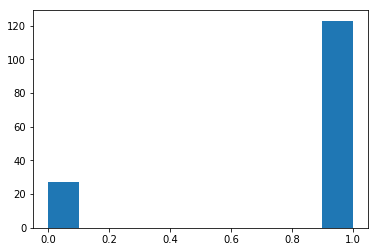

In [5]:
plt.hist(data.is_train)

In [6]:
condicion_separacion = data['is_train'] == 1
train, test = data[ condicion_separacion ], data[ ~condicion_separacion ]

In [7]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit( train[predictors], train[objetivo] )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [8]:
preds = tree.predict( test[predictors] )

In [9]:
pd.crosstab(test[objetivo], preds, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,setosa,versicolor,virginica
Actual,,,
setosa,8,0,0
versicolor,0,7,0
virginica,0,3,9


## Visualización del arbol

In [10]:
from sklearn.tree import export_graphviz 

In [11]:
path = './resources/tree_img/iris_dtree.dot'
with open(path , 'w') as dotFile:
    export_graphviz(tree, out_file= dotFile, feature_names=predictors)
    dotFile.close()

In [12]:
import os
from graphviz import Source

In [13]:
file = open(path, 'r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 123\\nvalue = [42, 43, 38]"] ;\n1 [label="entropy = 0.0\\nsamples = 42\\nvalue = [42, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 0.997\\nsamples = 81\\nvalue = [0, 43, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Sepal.Length <= 7.1\\nentropy = 0.162\\nsamples = 42\\nvalue = [0, 41, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 41\\nvalue = [0, 41, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 5.05\\nentropy = 0.292\\nsamples = 39\\nvalue = [0, 2, 37]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 8\\nvalue = [0, 2, 6]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 31\\nvalue = [0, 0, 31]"] ;\n6 -> 8 ;\n}'

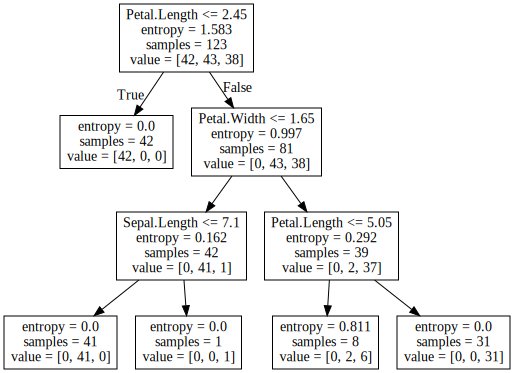

In [14]:
Source(text)

### Guardar el arbol en formato .png

In [15]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [16]:
dot_data = export_graphviz(tree, feature_names=predictors)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

## Cross Validation

In [17]:
X = data[ predictors ]
Y = data[ objetivo ]

In [18]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [19]:
from sklearn.model_selection import KFold, cross_val_score

In [20]:
cv = KFold( n_splits=10, shuffle=True, random_state=1)

In [21]:
score = np.mean( cross_val_score(tree, X, Y, scoring='accuracy', cv= cv, n_jobs=1) )

In [22]:
score

0.9333333333333333

In [23]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold( n_splits=10, shuffle=True, random_state=1)
    score = np.mean( cross_val_score(tree, X, Y, scoring='accuracy', cv= cv, n_jobs=1) )
    print('i= ',i,' la media dio: ',score)
    print('    ', tree.feature_importances_)

i=  1  la media dio:  0.5666666666666667
     [0. 0. 1. 0.]
i=  2  la media dio:  0.9200000000000002
     [0.         0.         0.66620285 0.33379715]
i=  3  la media dio:  0.9400000000000001
     [0.         0.         0.68976981 0.31023019]
i=  4  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  5  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  6  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  7  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  8  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  9  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
i=  10  la media dio:  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(n_jobs=3, oob_score=True, n_estimators=101)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=3,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [30]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [31]:
forest.oob_score_

0.9533333333333334